In [1]:
!pip install --upgrade numpy==1.24.3 gensim
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but

^C
^C


In [2]:
with open('alice.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Optional: Remove Gutenberg-specific parts if still present
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK"
text = text[text.find(start_marker):text.find(end_marker)]


#Clean and preprocess the text

In [3]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [4]:
# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Clean and tokenize
text = text.lower()  # lowercase the text
doc = nlp(text)  # process the text

# Extract alphabetic tokens and remove stopwords
cleaned_tokens = [token.text for token in doc if token.is_alpha and token.text not in STOP_WORDS]

print(cleaned_tokens[:20])

['start', 'project', 'gutenberg', 'ebook', 'illustration', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool']


#Visualize word frequencies using a word cloud and a bar chart

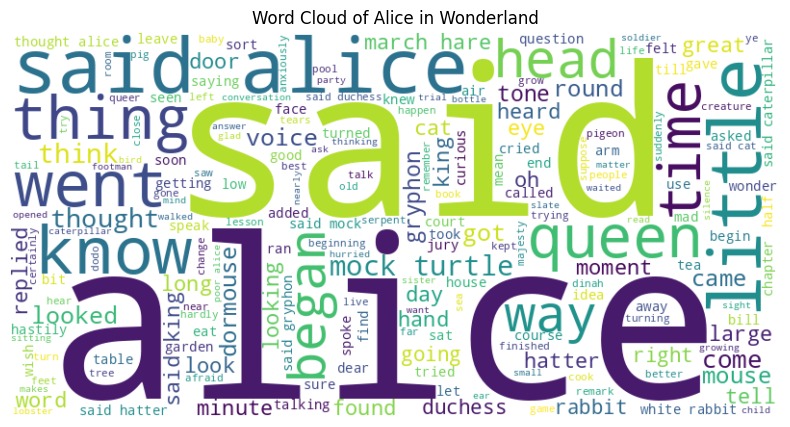

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Alice in Wonderland')
plt.show()


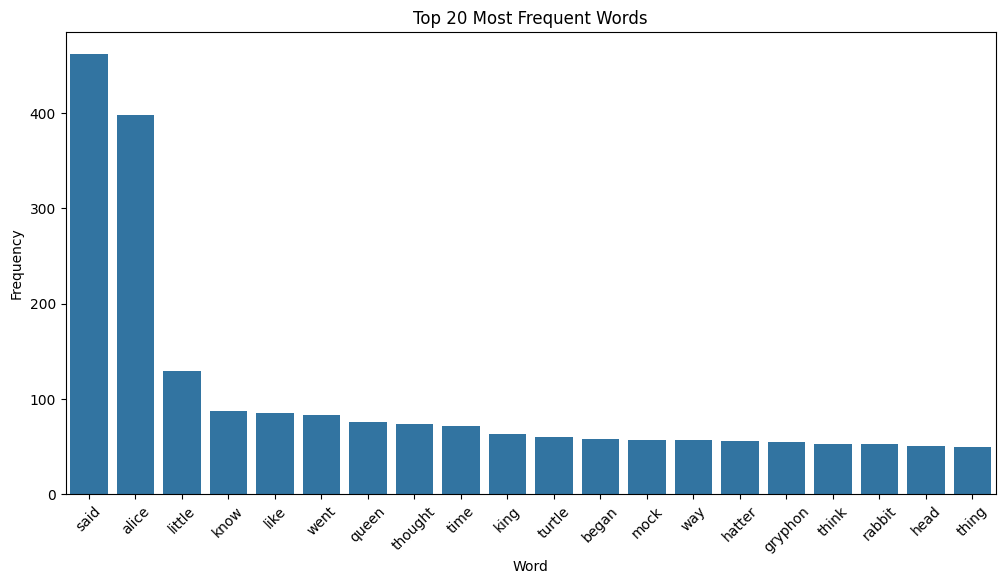

In [6]:
from collections import Counter
import seaborn as sns
import pandas as pd

freq_dist = Counter(cleaned_tokens)
top_words = freq_dist.most_common(20)
df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Word', y='Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.show()


#Semantic Word Relationships (GloVe + PCA)

In [7]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-100")


In [8]:
print(glove_model['alice'][:10])  # Shows first 10 values of the 'alice' vector
print(glove_model.most_similar('queen'))

[ 0.28502  -0.43555   0.061894 -0.36559  -0.13058   0.095261 -0.088582
  0.62312  -0.32084  -1.0674  ]
[('princess', 0.7947245240211487), ('king', 0.7507690191268921), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026164054871), ('lady', 0.7044796943664551), ('victoria', 0.6853758096694946), ('monarch', 0.6683257818222046), ('crown', 0.6680562496185303), ('prince', 0.6640506386756897), ('consort', 0.6570538282394409)]


In [9]:
from collections import Counter

# Use your existing cleaned_tokens from earlier
freq_dist = Counter(cleaned_tokens)
top_words = [word for word, _ in freq_dist.most_common(50)]


In [10]:
words_to_plot = [word for word in top_words if word in glove_model]


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the vectors
X = [glove_model[word] for word in words_to_plot]

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


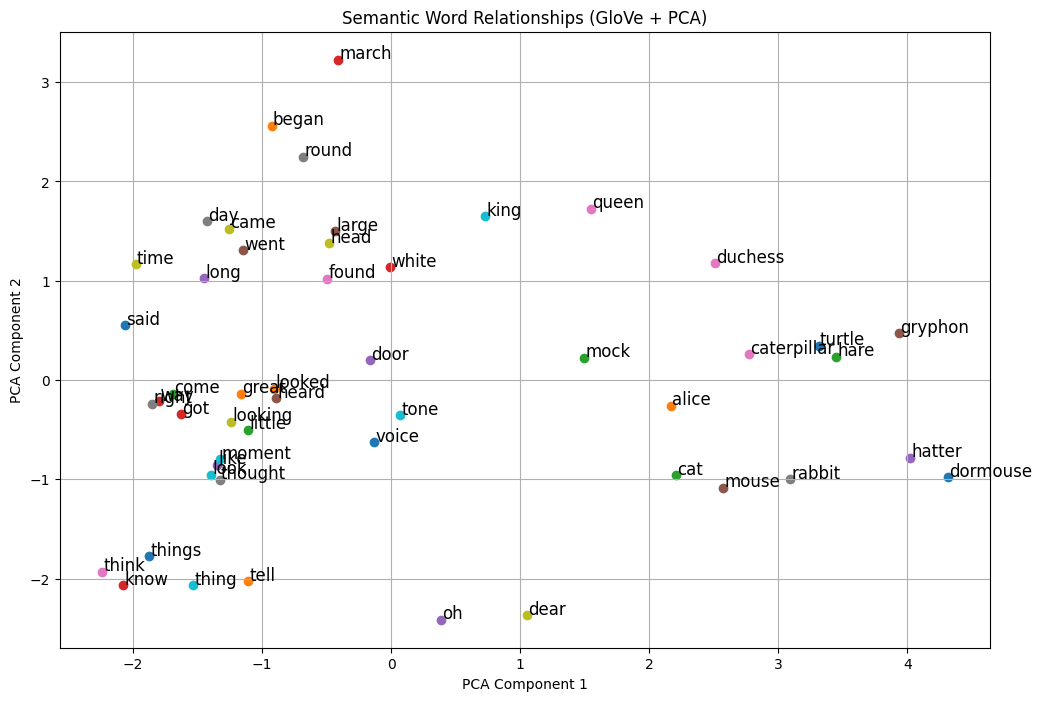

In [12]:
plt.figure(figsize=(12, 8))
for i, word in enumerate(words_to_plot):
    plt.scatter(X_pca[i, 0], X_pca[i, 1])
    plt.text(X_pca[i, 0] + 0.01, X_pca[i, 1] + 0.01, word, fontsize=12)

plt.title("Semantic Word Relationships (GloVe + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


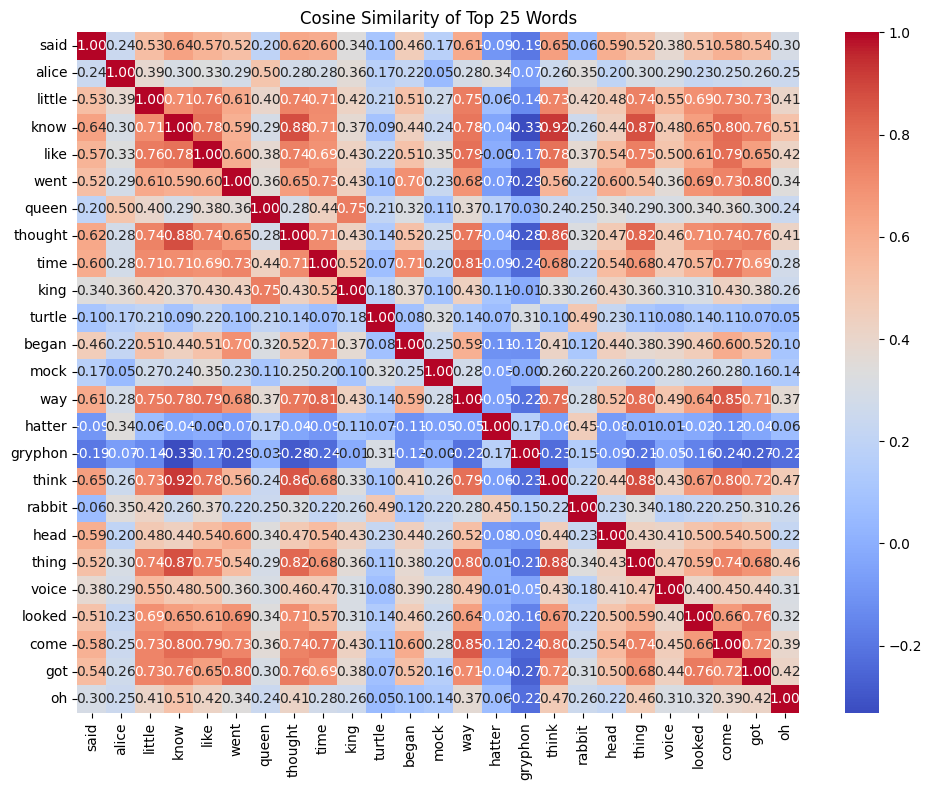

In [16]:
top25 = words_to_plot[:25]
vectors = np.array([glove_model[word] for word in top25])
similarity_matrix = cosine_similarity(vectors)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix,
            xticklabels=top25,
            yticklabels=top25,
            cmap='coolwarm',
            annot=True,
            fmt=".2f")

plt.title("Cosine Similarity of Top 25 Words")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
